# Explore here

In [2]:
import pandas as pd

# Ruta local del archivo CSV descargado
archivo_csv = "/Users/luiseduardogarciablanco/Desktop/bootcamp/machin learning regression/regresion lineal clase 5:7/machine-learning-reglineal/src/medical_insurance_cost.csv"  

# Crear el DataFrame desde el archivo CSV
df = pd.read_csv(archivo_csv)

# Visualizar las primeras filas del DataFrame para verificar los datos
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


age.  = Edad del beneficiario principal (numérico)
sex.  = Género del beneficiario principal (categórico)
bmi. = índice de masa corporal (numérico)
children.  = Número de niños/dependientes cubiertos por un seguro médico (numérico)
smoker.= ¿Es fumador? (categórico)
region. =  Área residencial del beneficiario en USA: noreste, sureste, suroeste, noroeste (categórico)
charges. = Prima del seguro médico (numérico)

In [3]:
#importamos librerias
df.info


<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [4]:
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [5]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

1


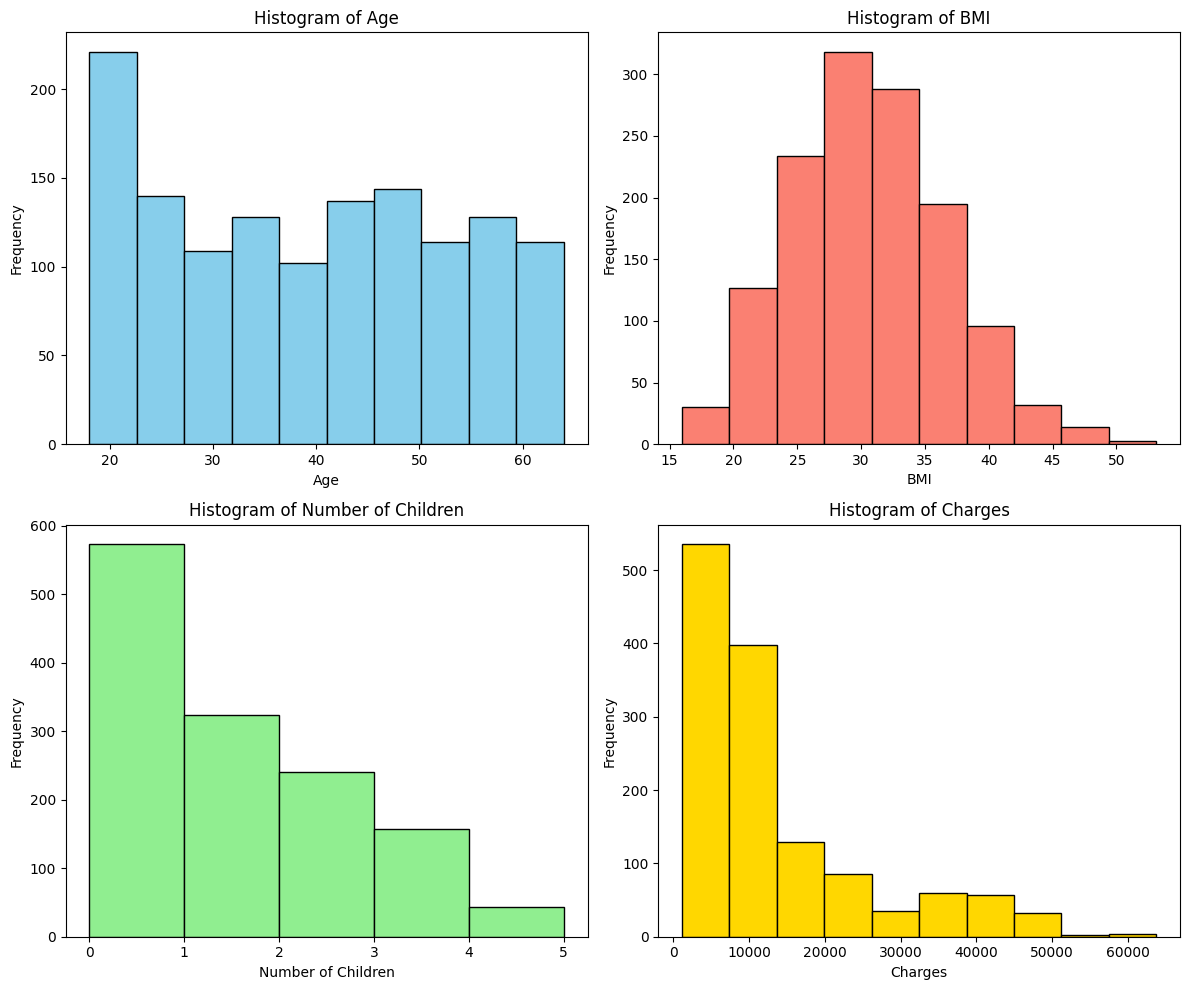

In [6]:
import pandas as pd
import matplotlib.pyplot as plt



# Crear un subplot de 2x2 para los histogramas
plt.figure(figsize=(12, 10))

# Histograma de 'age'
plt.subplot(2, 2, 1)
plt.hist(df['age'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

# Histograma de 'bmi'
plt.subplot(2, 2, 2)
plt.hist(df['bmi'], bins=10, color='salmon', edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Histogram of BMI')

# Histograma de 'children'
plt.subplot(2, 2, 3)
plt.hist(df['children'], bins=5, color='lightgreen', edgecolor='black')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Children')

# Histograma de 'charges'
plt.subplot(2, 2, 4)
plt.hist(df['charges'], bins=10, color='gold', edgecolor='black')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Histogram of Charges')

# Ajustar el espacio entre los subplots para que no se superpongan
plt.tight_layout()

# Mostrar el subplot
plt.show()

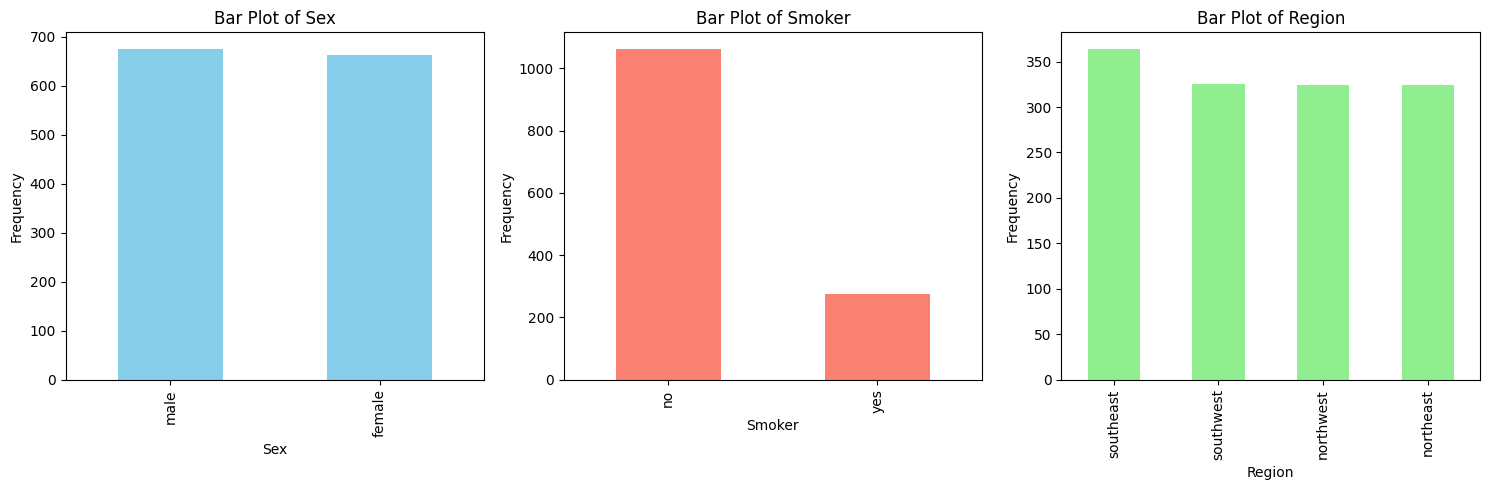

In [7]:
import pandas as pd
import matplotlib.pyplot as plt



# Crear un subplot para los gráficos de barras de las variables categóricas
plt.figure(figsize=(15, 5))

# Gráfico de barras de 'sex'
plt.subplot(1, 3, 1)
df['sex'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.title('Bar Plot of Sex')

# Gráfico de barras de 'smoker'
plt.subplot(1, 3, 2)
df['smoker'].value_counts().plot(kind='bar', color='salmon')
plt.xlabel('Smoker')
plt.ylabel('Frequency')
plt.title('Bar Plot of Smoker')

# Gráfico de barras de 'region'
plt.subplot(1, 3, 3)
df['region'].value_counts().plot(kind='bar', color='lightgreen')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.title('Bar Plot of Region')

# Ajustar el espacio entre los subplots para que no se superpongan
plt.tight_layout()

# Mostrar el subplot
plt.show()

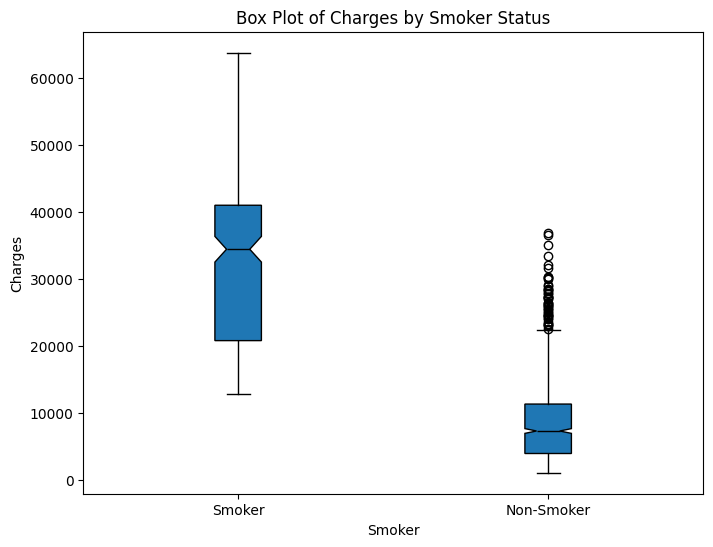

In [8]:


# Crear el gráfico de caja
plt.figure(figsize=(8, 6))
plt.boxplot([df[df['smoker'] == 'yes']['charges'], df[df['smoker'] == 'no']['charges']],
            labels=['Smoker', 'Non-Smoker'], notch=True, patch_artist=True, medianprops=dict(color='black'))

plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Box Plot of Charges by Smoker Status')

# Mostrar el gráfico
plt.show()

In [9]:
# Contar no fumadores con cargos entre 20000 y 40000
df_nosmoke = df[df['smoker'] == 'no']
#print (df_nosmoke)

# Contar cuántos pagan más de 20000 en charges en df_nosmoke
count_over_20000 = df_nosmoke[df_nosmoke['charges'] >= 20000].shape[0]

print(f"El número de no fumadores que pagan más de 20000 en charges es: {count_over_20000}")

El número de no fumadores que pagan más de 20000 en charges es: 61


In [10]:
# Contar no fumadores con cargos entre 20000 y 40000
df_smoke = df[df['smoker'] == 'yes']
#print (df_nosmoke)

# Contar cuántos pagan más de 20000 en charges en df_nosmoke
count_over_20000 = df_smoke[df_smoke['charges'] >= 20000].shape[0]
print(count_over_20000)
print(f"El número de fumadores que pagan más de 20000 en charges es: {count_over_20000}")

212
El número de fumadores que pagan más de 20000 en charges es: 212


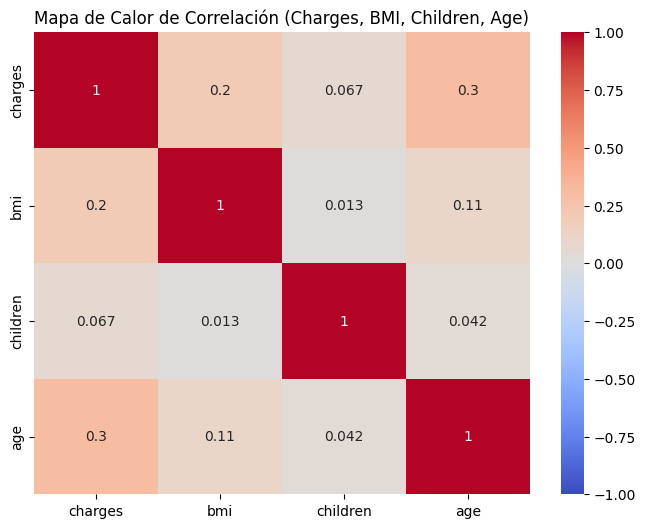

In [11]:
import seaborn as sns
# mapa de calor entre las variables numericas
df_selected = df[['charges', 'bmi', 'children', 'age']]

# Calcular la matriz de correlación entre las columnas seleccionadas
correlation_matrix = df_selected.corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(8, 6))

# Crear el mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Añadir título
plt.title('Mapa de Calor de Correlación (Charges, BMI, Children, Age)')

# Mostrar el mapa de calor
plt.show()

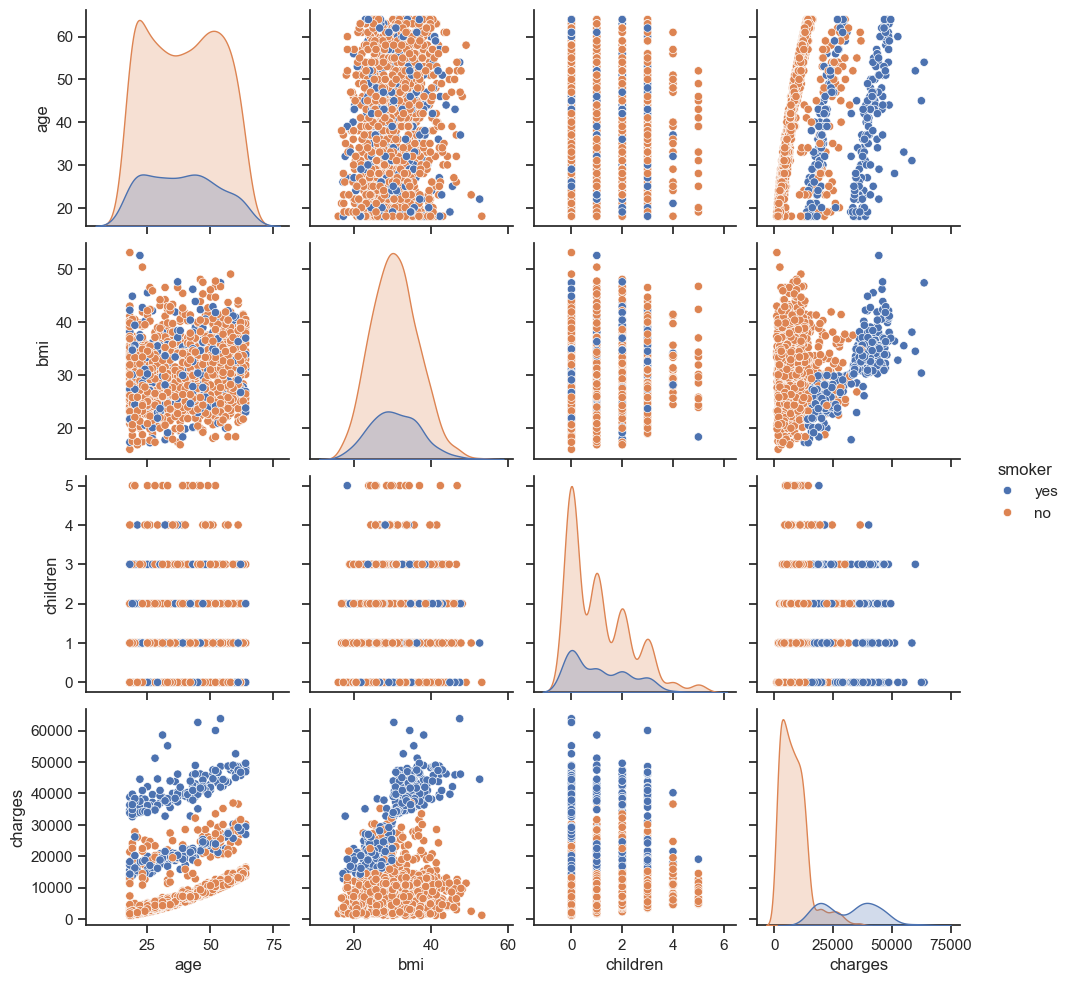

In [12]:

# Configurar el estilo de seaborn
sns.set(style="ticks", color_codes=True)

# Crear el pairplot
sns.pairplot(df, hue='smoker', diag_kind='auto')

# Mostrar el pairplot
plt.show()

In [13]:
# Contar cuántos smoker = yes tienen bmi >= 30 (obesidad)
count_smoker_yes_high_bmi = df[(df['smoker'] == 'yes') & (df['bmi'] >= 30)].shape[0]

print(f"Número de personas fumadoras con BMI >= 30 (obesidad): {count_smoker_yes_high_bmi}")

Número de personas fumadoras con BMI >= 30 (obesidad): 145


In [14]:
from sklearn.model_selection import train_test_split
# Codificar las variables categóricas usando factorize
df['region_factorized'], region_uniques = pd.factorize(df['region'])
df['sex_factorized'], sex_uniques = pd.factorize(df['sex'])
df['smoker_factorized'], smoker_uniques = pd.factorize(df['smoker'])

# Visualizar los primeros datos del DataFrame para verificar la codificación
print(df.head())

# Separar características y objetivo
X = df[['age', 'bmi', 'children', 'region_factorized', 'sex_factorized', 'smoker_factorized']]
y = df['charges']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


   age     sex     bmi  children smoker     region      charges  \
0   19  female  27.900         0    yes  southwest  16884.92400   
1   18    male  33.770         1     no  southeast   1725.55230   
2   28    male  33.000         3     no  southeast   4449.46200   
3   33    male  22.705         0     no  northwest  21984.47061   
4   32    male  28.880         0     no  northwest   3866.85520   

   region_factorized  sex_factorized  smoker_factorized  
0                  0               0                  0  
1                  1               1                  1  
2                  1               1                  1  
3                  2               1                  1  
4                  2               1                  1  


In [25]:
#dividimos datos entre train y test

from sklearn.model_selection import train_test_split



# Separar las características (X) y la variable objetivo (y)
X = df[['age', 'bmi', 'children', 'region_factorized', 'sex_factorized', 'smoker_factorized']] # Ejemplo: características numéricas
y = df['charges']  # Variable objetivo

# Dividir el conjunto de datos en entrenamiento y prueba (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar dimensiones de los conjuntos de datos
print(f'Dimensiones de X_train: {X_train.shape}')
print(f'Dimensiones de X_test: {X_test.shape}')
print(f'Dimensiones de y_train: {y_train.shape}')
print(f'Dimensiones de y_test: {y_test.shape}')


Dimensiones de X_train: (1069, 6)
Dimensiones de X_test: (268, 6)
Dimensiones de y_train: (1069,)
Dimensiones de y_test: (268,)


In [27]:
# cargamos librerias para iniciar modelo de regrecion lineal
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score


In [28]:
# Crear características polinómicas de grado 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Entrenar el modelo de regresión lineal en las características polinómicas
linear_model = LinearRegression()
linear_model.fit(X_train_poly, y_train)


LinearRegression()

In [29]:
# Hacer predicciones
y_pred = linear_model.predict(X_test_poly)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R^2: {r2:.2f}')

Mean Squared Error (MSE): 24687811.89
Mean Absolute Error (MAE): 3369.96
Root Mean Squared Error (RMSE): 4968.68
R^2: 0.87


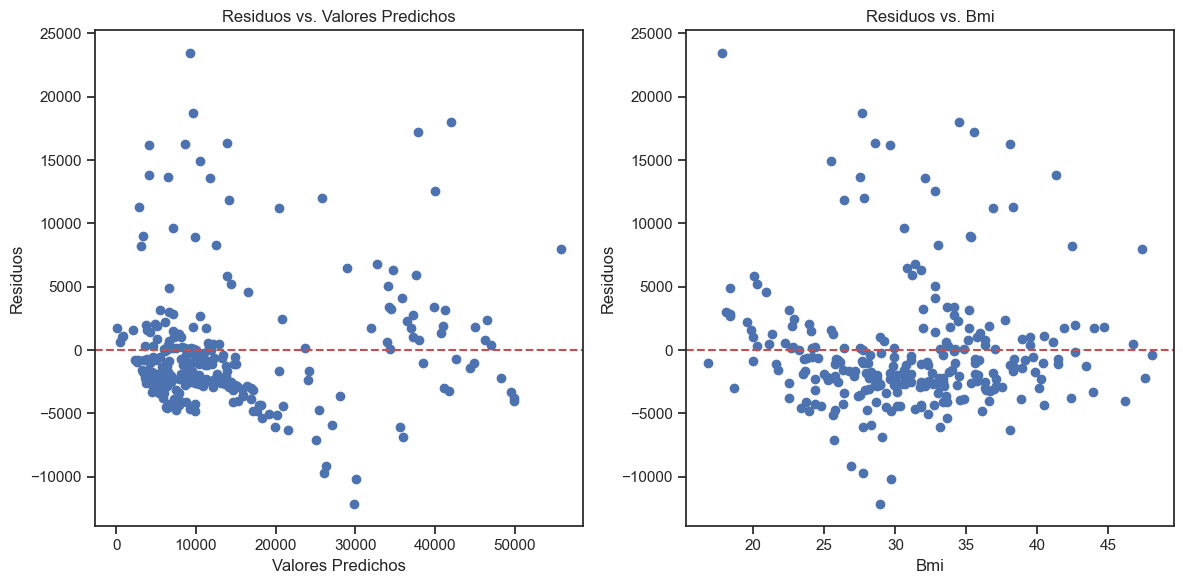

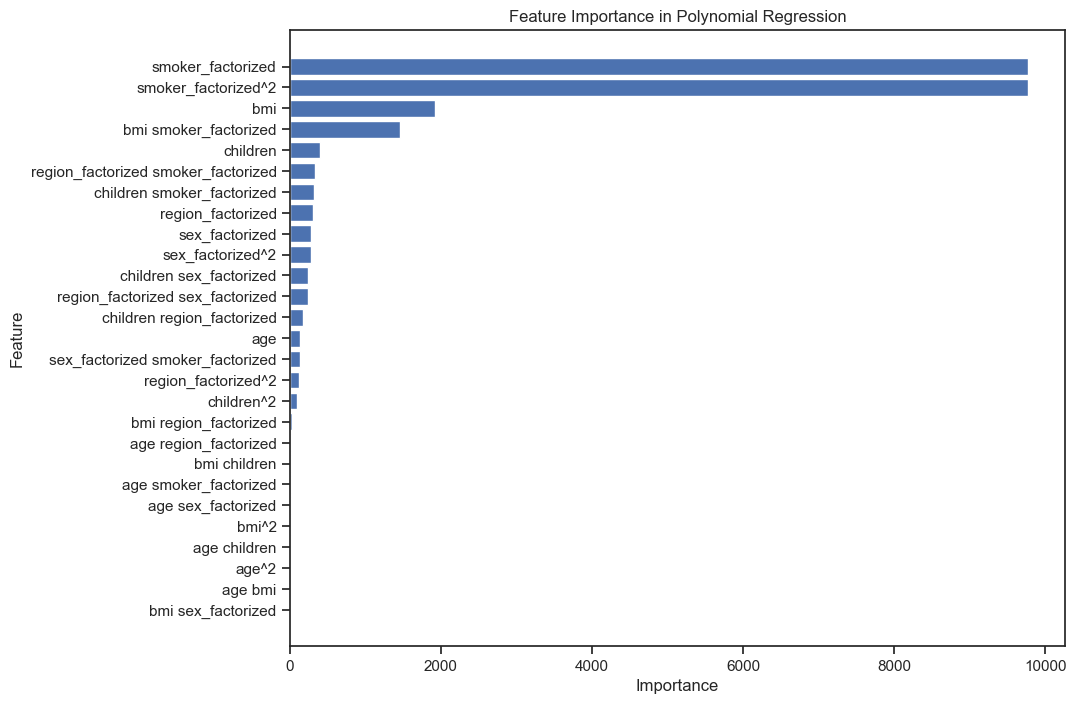

Mean Squared Error (MSE): 24687811.89
Mean Absolute Error (MAE): 3369.96
Root Mean Squared Error (RMSE): 4968.68
R^2: 0.87


In [38]:

# Análisis de los residuos
residuals = y_test - y_pred

plt.figure(figsize=(12, 6))

# Gráfico de residuos vs. valores predichos
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Residuos vs. Valores Predichos')

# Gráfico de residuos vs. variable independiente (ejemplo: age)
plt.subplot(1, 2, 2)
plt.scatter(X_test['bmi'], residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Bmi')
plt.ylabel('Residuos')
plt.title('Residuos vs. Bmi')

plt.tight_layout()
plt.show()

# Importancia de las características
# Crear características polinómicas de grado 2 (excluyendo el término constante)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Obtener los coeficientes del modelo entrenado
coefficients = linear_model.coef_

# Crear un DataFrame con los nombres de las características y sus coeficientes
feature_names = poly_features.get_feature_names_out(X_train.columns)
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Calcular la importancia de las características como el valor absoluto de los coeficientes
coef_df['Importance'] = np.abs(coef_df['Coefficient'])

# Ordenar el DataFrame por importancia de mayor a menor
coef_df = coef_df.sort_values(by='Importance', ascending=False)

# Graficar la importancia de las características, excluyendo el término constante si existiera
plt.figure(figsize=(10, 8))
plt.barh(coef_df['Feature'], coef_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Polynomial Regression')
plt.gca().invert_yaxis()  # Invertir el eje Y para que las características más importantes estén en la parte superior
plt.show()

# volvemos a mostrar los resultados de la prediccion
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R^2: {r2:.2f}')


Interpretación de los Resultados del Modelo de regresion polinomica

Precisión del Modelo:

Un  R^2  de 0.87 en una regresión polinómica significa que nuestro modelo puede explicar el 87% de las variaciones en los costos del seguro (charges). Esto es muy bueno y sugiere que el modelo se ajusta bien a los datos y que las características que estamos usando (edad, sexo, IMC, hijos, fumador y región) están bien relacionadas con los costos del seguro.
	
El 87% de las variaciones en los costos del seguro pueden ser explicadas por las características incluidas en el modelo. Esto significa que solo un 13% de las variaciones se deben a factores que no hemos considerado en el modelo o a algo de ruido o aleatoriedad en los datos.

Importancia de las Características:
  
Para entender mejor el modelo, es importante ver cuáles características están contribuyendo más a esta precisión. en la grafica se muestra cuánto está contribuyendo cada característica en la predicción de la variable objetivo (charges).

Claramente las caracteristicas mas relevants en la prediccion del "Charges" es el categorico "smoker" (fumador) y el "bmi" (indice d masa corporal)

¿habria forma de aumentar la eficacia del modelo? quiza si, deberiamos tener mas datos como por ejemplo:

        - Consumo de Alcohol 
        - Consumo de Drogas
        - Algun Familiar que haya sufrido cancer?
        - Algun familiar que haya sufrido diabetes?
        - El cliente realiza grandes desplazamientos para ir al trabajo diariamente?
        - se ha realizado alguna intervencion quirurgica de importancia (ejemplos)?
